In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, LassoCV, Ridge, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier

from tensorflow.keras import layers, models #neural network architecture
from tensorflow.keras.callbacks import EarlyStopping #regularization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras #keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf #tensorflow

from scipy import stats

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

In [129]:
# Loading CSV file
df = pd.read_csv("./output/df1.csv")
df

,SEQN,weight,height,BMI,waist_circumference,hypertension,take_HTN_medicine,high_cholesterol,take_HCL_medicine,60_sec_pulse,systolic_bp,diastolic_bp,gender,age,race,education_level,marital_status,diabetes,heart_failure,coronary_heart_disease,angina,heart_attack,stroke
0,83732.0,94.8,184.5,27.8,101.1,0.0,Missing,0.0,Missing,76.0,122.67,65.33,1,6.200000e+01,White,College Graduate or Above,Married/Partner,1.0,0,0,0,0,0
1,83733.0,90.4,171.4,30.8,107.9,0.0,Missing,0.0,Missing,72.0,140.00,86.00,1,5.300000e+01,White,High School,Widowed/Divorced/Separated,0.0,0,0,0,0,0
2,83734.0,83.4,170.1,28.8,116.5,1.0,1,1.0,0,56.0,135.33,45.33,1,7.800000e+01,White,High School,Married/Partner,1.0,0,0,0,1,0
3,83735.0,109.8,160.9,42.4,110.1,0.0,Missing,0.0,Missing,78.0,134.00,70.00,0,5.600000e+01,White,College Graduate or Above,Married/Partner,0.0,0,0,0,0,0
4,83736.0,55.2,164.9,20.3,80.4,0.0,Missing,0.0,Missing,76.0,104.00,60.00,0,4.200000e+01,Black,Some College or AA Degree,Widowed/Divorced/Separated,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25526,124795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.000000e+00,Other Hispanic,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing
25527,124800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.397605e-79,Black,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN
25528,124801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000e+00,Mexican,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing
25529,124804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000e+00,White,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing


In [130]:
df1 = df.replace('Missing', np.nan)

In [131]:
df1.update(df1['hypertension'].fillna('0'))
df1.update(df1['high_cholesterol'].fillna('0'))
df1.update(df1['take_HTN_medicine'].fillna('0'))
df1.update(df1['take_HCL_medicine'].fillna('0'))
df1.update(df1['heart_failure'].fillna('0'))
df1.update(df1['coronary_heart_disease'].fillna('0'))
df1.update(df1['angina'].fillna('0'))
df1.update(df1['heart_attack'].fillna('0'))
df1.update(df1['stroke'].fillna('0'))
df1.update(df1['diabetes'].fillna('0'))

In [133]:
df1['hypertension'].replace({1.0: '1', # Yes
                             0.0: '0'  # No
                        }, inplace=True)

In [134]:
df1['hypertension'].value_counts()

0    19918
1     5613
Name: hypertension, dtype: int64

In [135]:
df1['heart_failure'].replace({1.0: '1', # Yes
                         0.0: '0'  # No
                        }, inplace=True)

In [136]:
df1['heart_failure'].value_counts()

0    24956
1      575
Name: heart_failure, dtype: int64

In [138]:
df1['diabetes'].replace({1.0: '1', # Yes
                         0.0: '0'  # No
                        }, inplace=True)

In [139]:
df1['diabetes'].value_counts()

0    23230
1     2301
Name: diabetes, dtype: int64

In [141]:
df1['high_cholesterol'].replace({1.0: '1', # Yes
                                 0.0: '0'  # No
                        }, inplace=True)

In [142]:
df1['high_cholesterol'].value_counts()

0    20282
1     5249
Name: high_cholesterol, dtype: int64

In [143]:
# replace the median value 
df1['weight'] = df1['weight'].fillna(df1['weight'].mean())
df1['height'] = df1['height'].fillna(df1['height'].mean())
df1['BMI'] = df1['BMI'].fillna(df1['BMI'].mean())
df1['waist_circumference'] = df1['waist_circumference'].fillna(df1['waist_circumference'].mean())
df1['60_sec_pulse'] = df1['60_sec_pulse'].fillna(df1['60_sec_pulse'].mean())
df1['systolic_bp'] = df1['systolic_bp'].fillna(df1['systolic_bp'].mean())
df1['diastolic_bp'] = df1['diastolic_bp'].fillna(df1['diastolic_bp'].mean())

In [144]:
df1.update(df1['education_level'].fillna('unlnown'))
df1.update(df1['marital_status'].fillna('unlnown'))

In [145]:
df1.isna().sum()

SEQN                      0
weight                    0
height                    0
BMI                       0
waist_circumference       0
hypertension              0
take_HTN_medicine         0
high_cholesterol          0
take_HCL_medicine         0
60_sec_pulse              0
systolic_bp               0
diastolic_bp              0
gender                    0
age                       0
race                      0
education_level           0
marital_status            0
diabetes                  0
heart_failure             0
coronary_heart_disease    0
angina                    0
heart_attack              0
stroke                    0
dtype: int64

In [146]:
df1.shape

(25531, 23)

In [147]:
df1[['take_HTN_medicine']] = df1[['take_HTN_medicine']].astype(int)
df1[['take_HCL_medicine']] = df1[['take_HCL_medicine']].astype(int)
df1[['heart_failure']] = df1[['heart_failure']].astype(int)
df1[['coronary_heart_disease']] = df1[['coronary_heart_disease']].astype(int)
df1[['hypertension']] = df1[['hypertension']].astype(int)
df1[['high_cholesterol']] = df1[['high_cholesterol']].astype(int)
df1[['angina']] = df1[['angina']].astype(int)
df1[['heart_attack']] = df1[['heart_attack']].astype(int)
df1[['stroke']] = df1[['stroke']].astype(int)
df1[['diabetes']] = df1[['diabetes']].astype(int)

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    25531 non-null  float64
 1   weight                  25531 non-null  float64
 2   height                  25531 non-null  float64
 3   BMI                     25531 non-null  float64
 4   waist_circumference     25531 non-null  float64
 5   hypertension            25531 non-null  int32  
 6   take_HTN_medicine       25531 non-null  int32  
 7   high_cholesterol        25531 non-null  int32  
 8   take_HCL_medicine       25531 non-null  int32  
 9   60_sec_pulse            25531 non-null  float64
 10  systolic_bp             25531 non-null  float64
 11  diastolic_bp            25531 non-null  float64
 12  gender                  25531 non-null  int64  
 13  age                     25531 non-null  float64
 14  race                    25531 non-null

In [149]:
df1 = df1.set_index('SEQN')

In [150]:
df1.columns

Index(['weight', 'height', 'BMI', 'waist_circumference', 'hypertension',
       'take_HTN_medicine', 'high_cholesterol', 'take_HCL_medicine',
       '60_sec_pulse', 'systolic_bp', 'diastolic_bp', 'gender', 'age', 'race',
       'education_level', 'marital_status', 'diabetes', 'heart_failure',
       'coronary_heart_disease', 'angina', 'heart_attack', 'stroke'],
      dtype='object')

In [151]:
# one hot encoding for race
enc = OneHotEncoder(sparse=False)
race_enc = enc.fit_transform(df1[['race']])
race_enc_names = enc.get_feature_names_out(['race'])
race_enc_df = pd.DataFrame(race_enc, columns = race_enc_names)
df1 = pd.concat([df1.reset_index(drop=True), race_enc_df.reset_index(drop=True)], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [152]:
# one hot encoding for education_level
education_enc = enc.fit_transform(df1[['education_level']])
education_enc_names = enc.get_feature_names_out(['education_level'])
education_enc_df = pd.DataFrame(education_enc, columns = education_enc_names)
df1 = pd.concat([df1.reset_index(drop=True), education_enc_df.reset_index(drop=True)], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [153]:
# one hot encoding for marital_status
marital_enc = enc.fit_transform(df1[['marital_status']])
marital_enc_names = enc.get_feature_names_out(['marital_status'])
marital_enc_df = pd.DataFrame(marital_enc, columns = marital_enc_names)
df1 = pd.concat([df1.reset_index(drop=True), marital_enc_df.reset_index(drop=True)], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [154]:
df1 = df1.drop(['race', 'education_level', 'marital_status', 'diastolic_bp'], axis=1)

In [155]:
df1.to_csv('./output/df_try.csv', index=False)

In [171]:
df1 = pd.read_csv("./output/df_try.csv")

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   weight                                     25531 non-null  float64
 1   height                                     25531 non-null  float64
 2   BMI                                        25531 non-null  float64
 3   waist_circumference                        25531 non-null  float64
 4   hypertension                               25531 non-null  int32  
 5   take_HTN_medicine                          25531 non-null  int32  
 6   high_cholesterol                           25531 non-null  int32  
 7   take_HCL_medicine                          25531 non-null  int32  
 8   60_sec_pulse                               25531 non-null  float64
 9   systolic_bp                                25531 non-null  float64
 10  gender                

In [164]:
df1.columns

Index(['weight', 'height', 'BMI', 'waist_circumference', 'hypertension',
       'take_HTN_medicine', 'high_cholesterol', 'take_HCL_medicine',
       '60_sec_pulse', 'systolic_bp', 'gender', 'age', 'diabetes',
       'heart_failure', 'coronary_heart_disease', 'angina', 'heart_attack',
       'stroke', 'race_Asian', 'race_Black', 'race_Mexican',
       'race_Other Hispanic', 'race_Other and Multiracial', 'race_White',
       'education_level_9-11th Grade',
       'education_level_College Graduate or Above',
       'education_level_High School', 'education_level_Less Than 9th Grade',
       'education_level_Some College or AA Degree', 'education_level_unlnown',
       'marital_status_Married/Partner', 'marital_status_Never Married',
       'marital_status_Widowed/Divorced/Separated', 'marital_status_unlnown'],
      dtype='object')

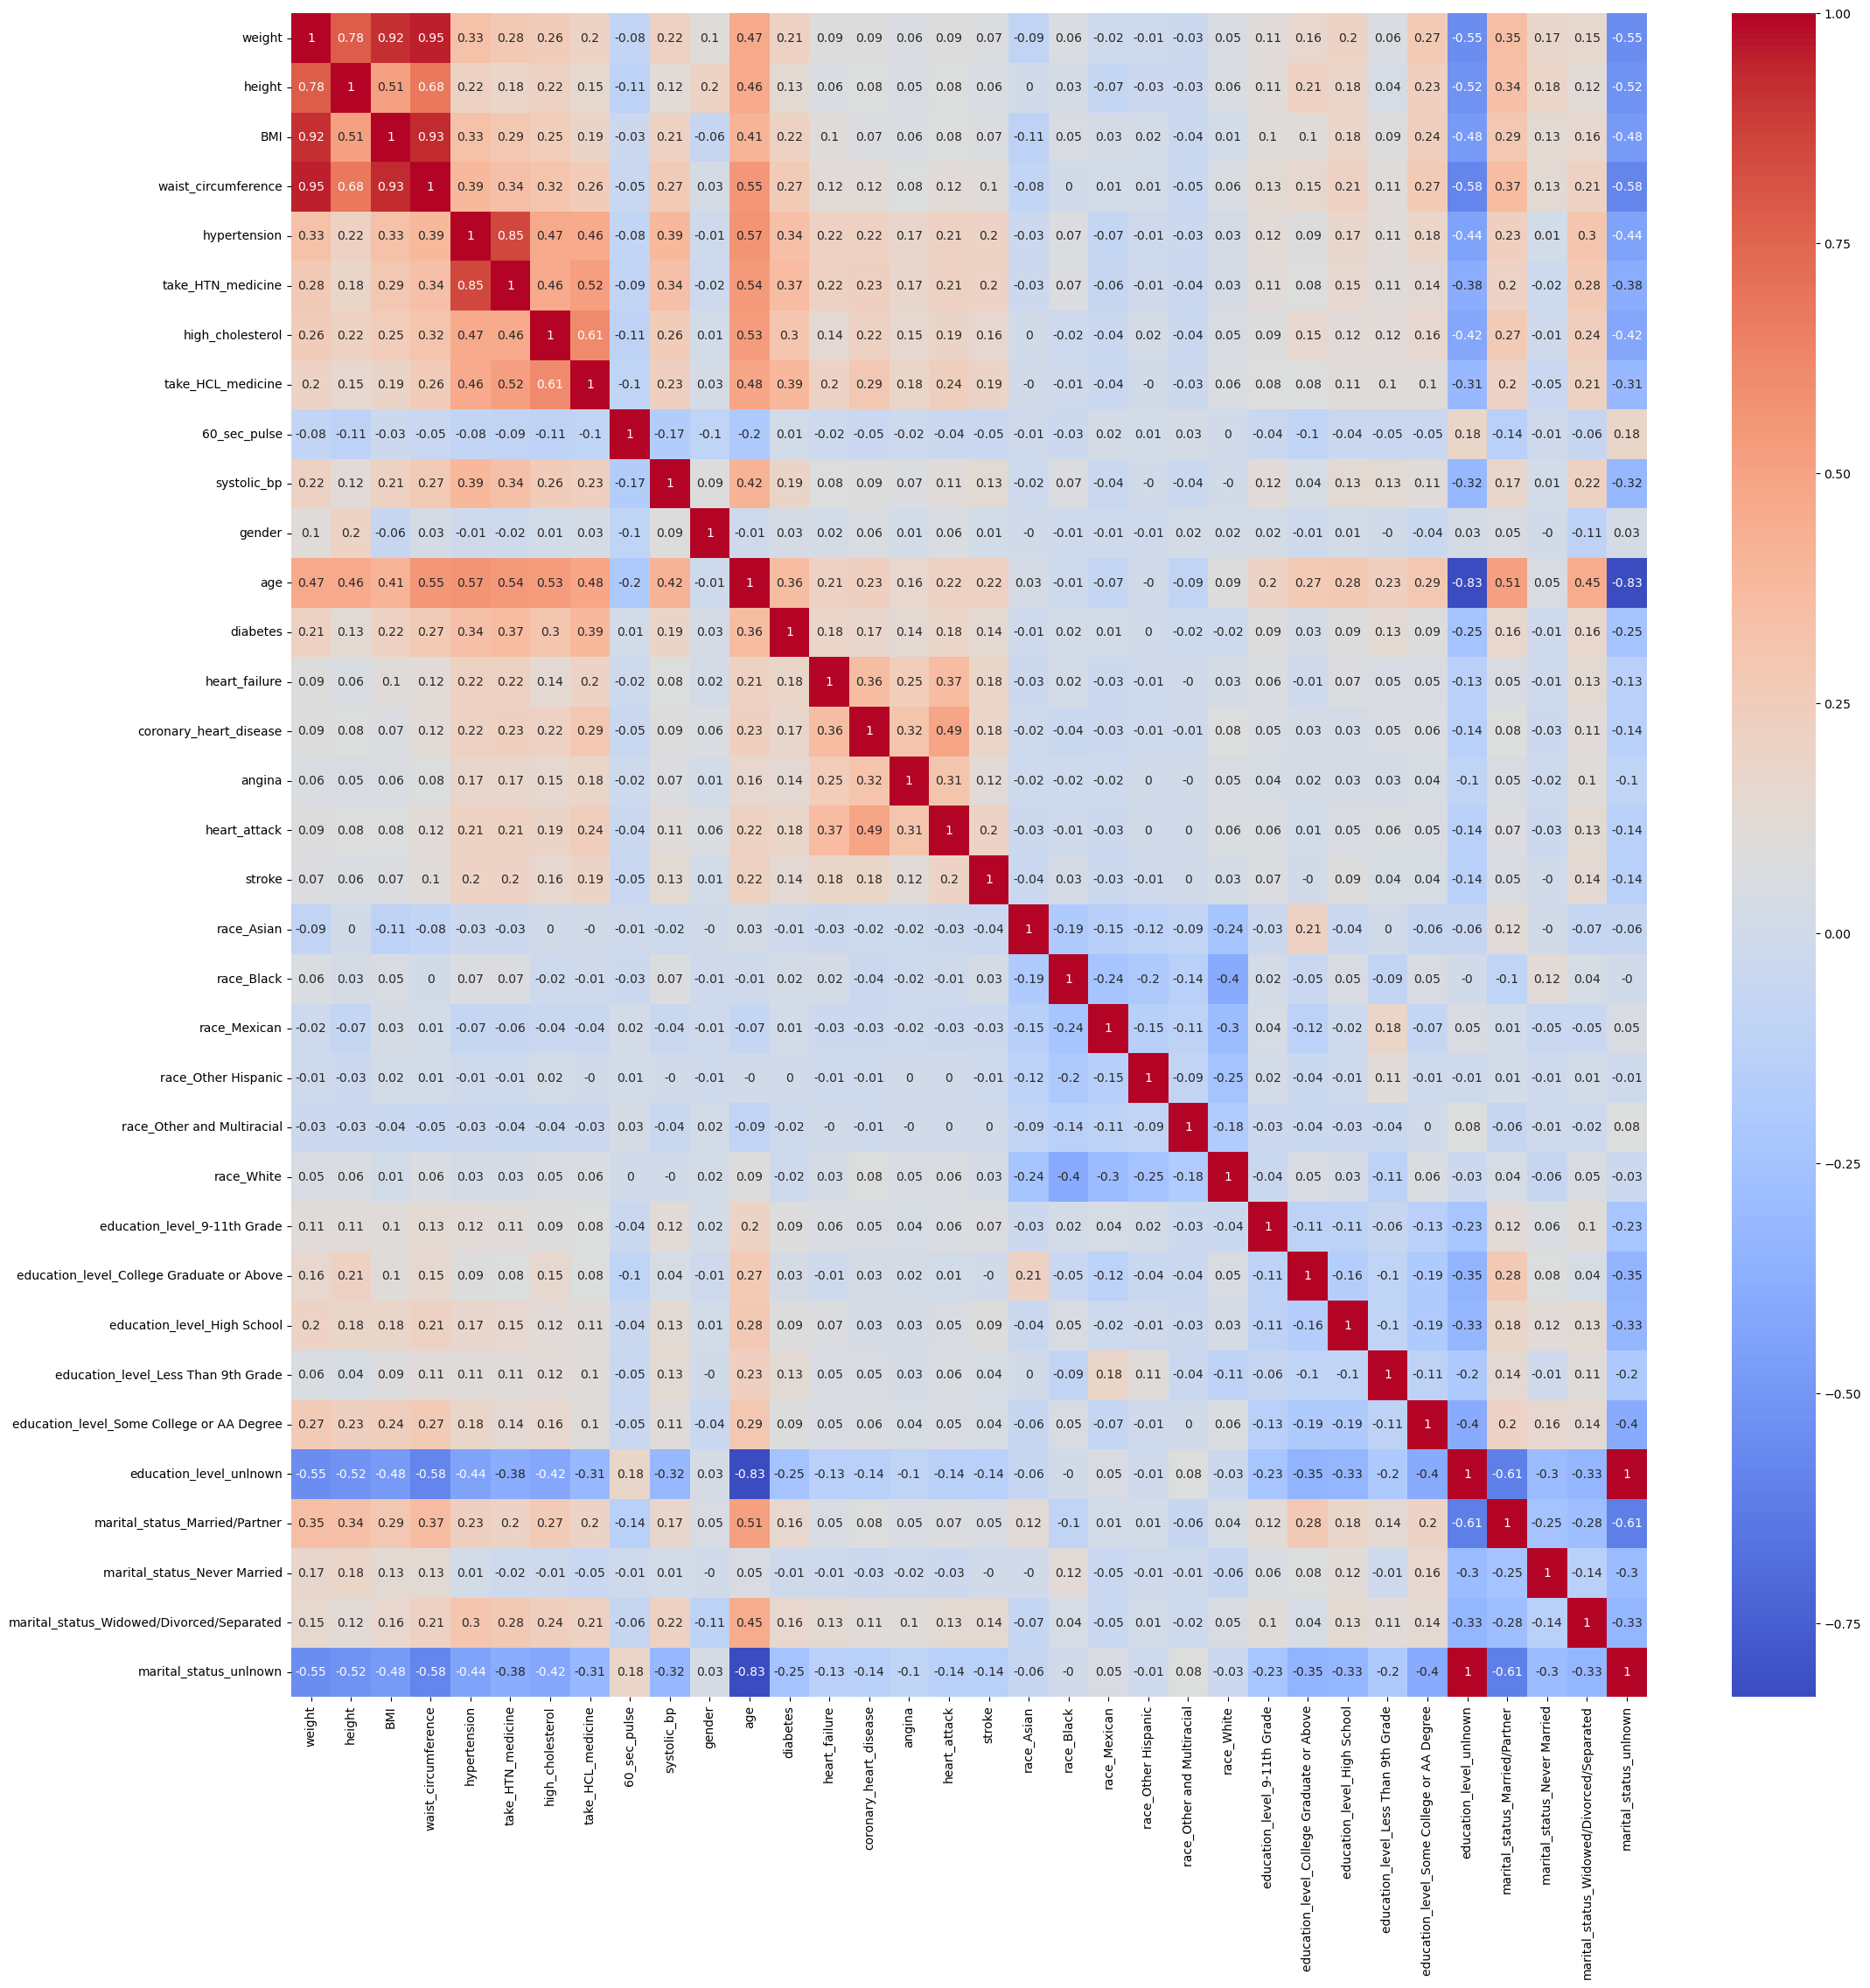

In [170]:
plt.figure(figsize=(25,25))

sns.heatmap(df1.corr().round(2), annot=True, cmap='coolwarm');

In [169]:
df_try = df1.drop([target], axis=1)

In [172]:
target = 'stroke'

In [173]:
X = df1.drop([target], axis=1)
y = df1[target]

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [175]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [181]:
model = Sequential()

model.add(Dense(32,  # How many neurons in Hidden Layer 1
                input_shape = (33,), activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [182]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                1088      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [183]:
X_train_sc.shape, y_train.shape

((19148, 33), (19148,))

In [184]:
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

In [185]:
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size = 512)

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 0.4152 - mae: 0.4667 - val_loss: 0.1867 - val_mae: 0.3079
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1308 - mae: 0.2548 - val_loss: 0.0997 - val_mae: 0.2143
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0848 - mae: 0.1949 - val_loss: 0.0738 - val_mae: 0.1762
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0669 - mae: 0.1663 - val_loss: 0.0605 - val_mae: 0.1541
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0559 - mae: 0.1472 - val_loss: 0.0521 - val_mae: 0.1383
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0487 - mae: 0.1330 - val_loss: 0.0462 - val_mae: 0.1266
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0436 - mae: 0.1221 - val_loss: 0.0423 - val_mae: 0.1181
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0399 - mae: 0.11

In [186]:
model.predict(X_test_sc)

200/200 [==============================] - 0s 2ms/step


array([[0.12445995],
       [0.05979359],
       [0.1273951 ],
       ...,
       [0.03178003],
       [0.19417971],
       [0.00305408]], dtype=float32)

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [219]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [220]:
model = Sequential()
model.add(Dense(32,
                input_shape=(33,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid is for output activation

In [221]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                1088      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [222]:
model.compile(loss = 'binary_crossentropy', metrics=['acc'], optimizer = 'adam')

In [223]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test),
                   epochs=30, batch_size = 512)

Epoch 1/30
38/38 [==============================] - 1s 7ms/step - loss: 0.4610 - acc: 0.8523 - val_loss: 0.2953 - val_acc: 0.9608
Epoch 2/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2313 - acc: 0.9681 - val_loss: 0.1746 - val_acc: 0.9729
Epoch 3/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1565 - acc: 0.9720 - val_loss: 0.1336 - val_acc: 0.9727
Epoch 4/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1288 - acc: 0.9722 - val_loss: 0.1167 - val_acc: 0.9729
Epoch 5/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1162 - acc: 0.9724 - val_loss: 0.1079 - val_acc: 0.9734
Epoch 6/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1092 - acc: 0.9717 - val_loss: 0.1030 - val_acc: 0.9731
Epoch 7/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1050 - acc: 0.9722 - val_loss: 0.0998 - val_acc: 0.9732
Epoch 8/30
38/38 [==============================] - 0s 4ms/step - loss: 0.1021 - acc: 0.97

In [194]:
history

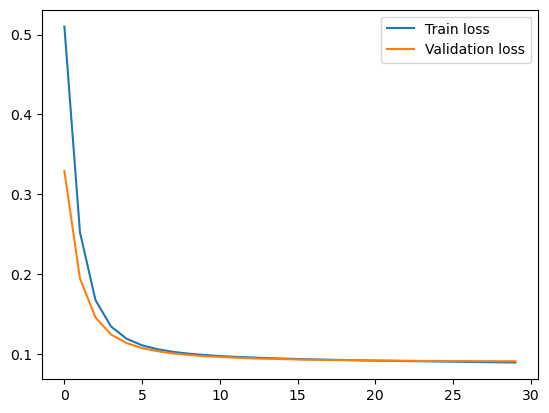

In [195]:
# history.history
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend();

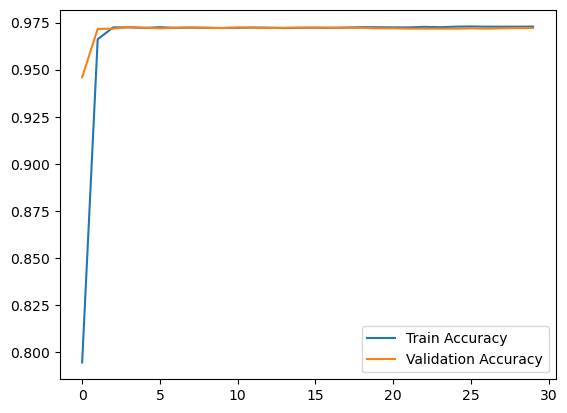

In [196]:
# history.history
plt.plot(history.history['acc'], label = "Train Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.legend();

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [207]:
X = df1.drop([target], axis=1)
y = df1[target]

X.shape,y.shape

((25531, 33), (25531,))

In [198]:
X, y = make_classification(n_samples=10_000, n_features=20, n_classes=3, random_state=42, 
                           n_informative=4 )

In [199]:
y[:5]

array([2, 2, 1, 0, 2])

In [200]:
from tensorflow.keras.utils import to_categorical

In [201]:
y = to_categorical(y)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [203]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [208]:
X_train_sc.shape

(7500, 20)

In [209]:
model = Sequential()
model.add(Dense(32, 
                input_shape=(20,),
                activation='relu'))
model.add(Dense(3, activation='softmax'))

In [210]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [211]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512)

Epoch 1/30
15/15 [==============================] - 1s 14ms/step - loss: 1.2968 - accuracy: 0.3501 - val_loss: 1.2172 - val_accuracy: 0.3524
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 1.1469 - accuracy: 0.3777 - val_loss: 1.0943 - val_accuracy: 0.4008
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 1.0458 - accuracy: 0.4360 - val_loss: 1.0141 - val_accuracy: 0.4764
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.9790 - accuracy: 0.5003 - val_loss: 0.9592 - val_accuracy: 0.5248
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.9323 - accuracy: 0.5484 - val_loss: 0.9184 - val_accuracy: 0.5592
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 0.8967 - accuracy: 0.5821 - val_loss: 0.8860 - val_accuracy: 0.5896
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.8679 - accuracy: 0.6011 - val_loss: 0.8598 - val_accuracy: 0.6132
Epoch 8/30
15/15 [=

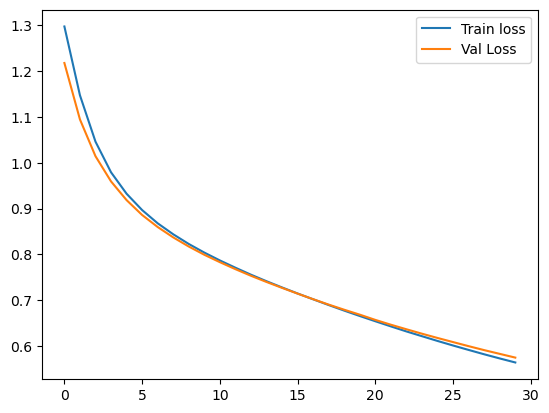

In [212]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

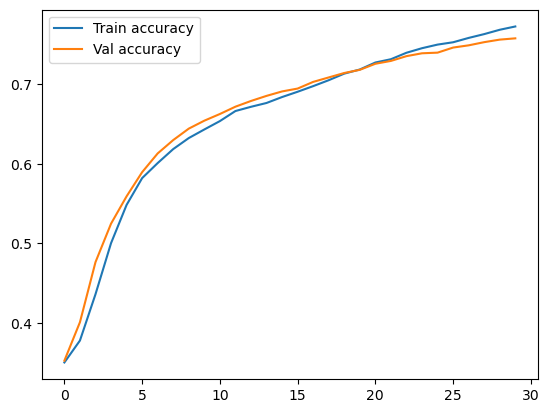

In [213]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [224]:
#Predict training set:
y_pred = model.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

200/200 [==============================] - 0s 1ms/step
[[6209    0]
 [ 174    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6209
           1       0.00      0.00      0.00       174

    accuracy                           0.97      6383
   macro avg       0.49      0.50      0.49      6383
weighted avg       0.95      0.97      0.96      6383



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [263]:
X = df1.drop([target], axis=1)
y = df1[target]

X.shape,y.shape

((25531, 33), (25531,))

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [265]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20424, 33), (5107, 33), (20424,), (5107,))

In [266]:
lg=LogisticRegression(max_iter = 30000)
lg.fit(X_train,y_train)

print('weights: ')
print(lg.coef_)
print('Intercept: ')
print(lg.intercept_)

weights: 
[[ 0.01998157 -0.03911659 -0.1002579   0.01428422  0.75335184 -0.23050458
   0.10075838  0.26893787 -0.00664857  0.00518523  0.08040425  0.03313044
   0.29912943  0.59239465  0.27168616  0.41091363  0.59214116 -0.65992836
   0.37475302 -0.32303442 -0.20553768  0.48786837  0.12800607  0.52454914
  -0.08145535  0.48872504  0.25986665  0.16781728 -1.55737576  0.28238834
   0.34722821  0.42645398 -1.25394353]]
Intercept: 
[-0.22849315]


In [267]:
#Predict training set:
y_pred = lg.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4954    2]
 [ 150    1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4956
           1       0.33      0.01      0.01       151

    accuracy                           0.97      5107
   macro avg       0.65      0.50      0.50      5107
weighted avg       0.95      0.97      0.96      5107



In [268]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [269]:
result=pd.DataFrame()
# Sensitivity, hit rate, recall, or true positive rate
result['TPR'] = [round(TP/(TP+FN),2)]
 # Specificity or true negative rate
result['TNR'] = [round(TN/(TN+FP),2) ]
        # Fall out or false positive rate
result['FPR'] = [round(FP/(FP+TN),2)]
         # False negative rate
result['FNR'] = [round(FN/(TP+FN),2)]

lg_probs = lg.predict_proba(X_test)
        # keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
result['AUC'] = [round(roc_auc_score(y_test, lg_probs),2)]
result

,TPR,TNR,FPR,FNR,AUC
0,0.01,1.0,0.0,0.99,0.92


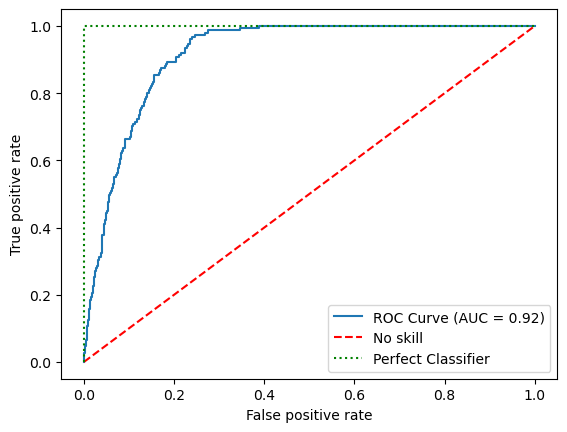

In [270]:
gbc_auc = roc_auc_score(y_test, lg_probs)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, lg_probs)
plt.plot(gbc_fpr, gbc_tpr, label='ROC Curve (AUC = %0.2f)' % (gbc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No skill')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [271]:
X.head(1)

,weight,height,BMI,waist_circumference,hypertension,take_HTN_medicine,high_cholesterol,take_HCL_medicine,60_sec_pulse,systolic_bp,gender,age,diabetes,heart_failure,coronary_heart_disease,angina,heart_attack,race_Asian,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,education_level_9-11th Grade,education_level_College Graduate or Above,education_level_High School,education_level_Less Than 9th Grade,education_level_Some College or AA Degree,education_level_unlnown,marital_status_Married/Partner,marital_status_Never Married,marital_status_Widowed/Divorced/Separated,marital_status_unlnown
0,94.8,184.5,27.8,101.1,0,0,0,0,76.0,122.67,1,62.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [272]:
X.shape

(25531, 33)

In [246]:
data = [[94.8,184.5,27.8,101.1,0,0,0,0,76.0,122.67,1,62.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]
data_pred = lg.predict(data)
data_pred

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [247]:
data_pred_prob = lg.predict_proba(data)[:, 1]
data_pred_prob

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.01846316])

In [250]:
# if the patents lost weight, the risk of getting stroke will be decrease from 1.85% to 1.46%
data = [[84.8,184.5,27.8,101.1,0,0,0,0,76.0,122.67,1,62.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]
data_pred_prob = lg.predict_proba(data)[:, 1]
data_pred_prob

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.01457694])

In [253]:
# if everything remain constant except age, the risk of getting stroke will be increased from 1.8% to 2.2%
data = [[94.8,184.5,27.8,101.1,0,0,0,0,76.0,122.67,1,67,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]
data_pred_prob = lg.predict_proba(data)[:, 1]
data_pred_prob

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.02236379])

In [258]:
# if patient get hypertension, the risk of getting stroke will be increased from 1.8% to 4.2%
data = [[94.8,184.5,27.8,101.1,1,0,0,0,76.0,142.67,1,62,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]
data_pred_prob = lg.predict_proba(data)[:, 1]
data_pred_prob

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.04168866])

In [259]:
# if patient get coronary_heart_disease, the risk of getting stroke will be increased from 1.8% to 7.8%
data = [[94.8,184.5,27.8,101.1,1,0,1,0,76.0,122.67,1,62,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]
data_pred_prob = lg.predict_proba(data)[:, 1]
data_pred_prob

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.0784826])

In [260]:
import pickle

In [262]:
model = 'stroke.pkl'
pickle.dump(df1, open(model,'wb'))